## Loading Dataset

In [1]:
!pip install apyori

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_theme(style="whitegrid")

In [3]:
data = pd.read_csv('Market_Basket_Optimisation.csv', header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape

(7501, 20)

## Data Preprocessing

In [5]:
transactions = []
for i in range(0,7501):
    transactions.append([str(data.values[i,j]) for j in range(0,20)])

## Data Visualizations

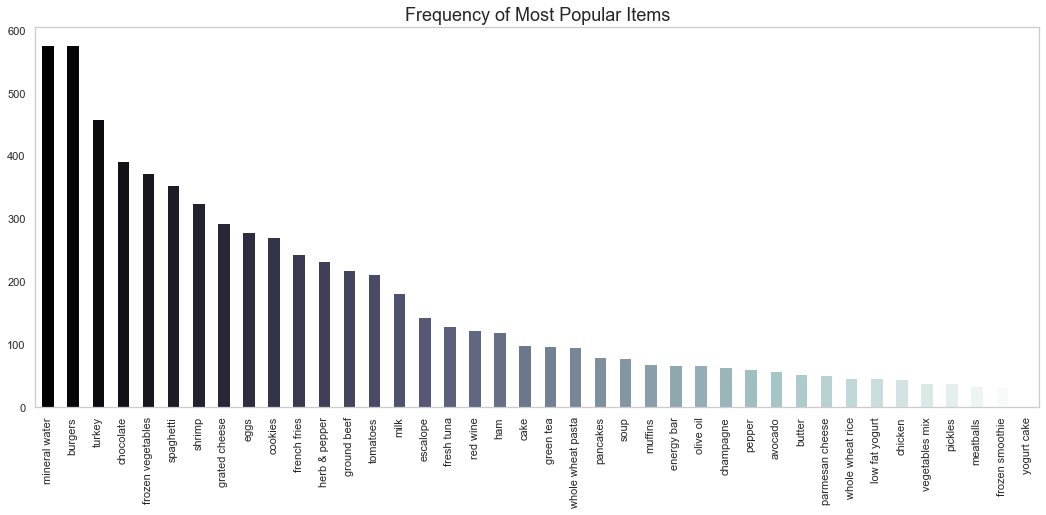

In [6]:
# looking at the frequency of most popular items 

plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.bone(np.linspace(0, 1, 40))
data[0].value_counts().head(40).plot.bar(color = color)
plt.title('Frequency of Most Popular Items', fontsize = 18)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

## Model Training and Evaluating

In [7]:
from apyori import apriori
rules = apriori(transactions = transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)

In [8]:
results = list(rules)
results #first results coming directly from the output of the apriori function

[RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'pasta', 'escalope'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'fromage blanc', 'honey'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0

In [9]:
#Putting the results well organised into a Pandas DataFrame
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

In [10]:
resultsinDataFrame #nonsorted

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,light cream,chicken,0.004533,0.290598,4.843951
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
2,pasta,escalope,0.005866,0.372881,4.700812
3,fromage blanc,honey,0.003333,0.245098,5.164271
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
5,tomato sauce,ground beef,0.005333,0.377358,3.840659
6,light cream,olive oil,0.003200,0.205128,3.114710
7,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
8,pasta,shrimp,0.005066,0.322034,4.506672


In [11]:
resultsinDataFrame.nlargest(n = 10, columns = 'Lift') #sorted by largest Lift

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
3,fromage blanc,honey,0.003333,0.245098,5.164271
0,light cream,chicken,0.004533,0.290598,4.843951
2,pasta,escalope,0.005866,0.372881,4.700812
8,pasta,shrimp,0.005066,0.322034,4.506672
7,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
5,tomato sauce,ground beef,0.005333,0.377358,3.840659
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
6,light cream,olive oil,0.003200,0.205128,3.114710
